# Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0,10.0)

#reading data
data=pd.read_csv(r"C:\Users\yash gandhi\Desktop\Python\headbrain.csv",sep=",")
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
#creating array of independent and dependent variables
X=data["Head Size(cm^3)"].values
Y=data["Brain Weight(grams)"].values

In [3]:
#find mean of x and y
mean_x=np.mean(X)
mean_y=np.mean(Y)
#total no of values
n=len(X)

#using the formula find m and c
num=0
den=0
for i in range (n):
    num+= (X[i]-mean_x)*(Y[i]-mean_y)
    den+= (X[i]-mean_x)**2

m=num/den
c=mean_y-(m*mean_x)   

print(m,c)

0.26342933948939945 325.57342104944223


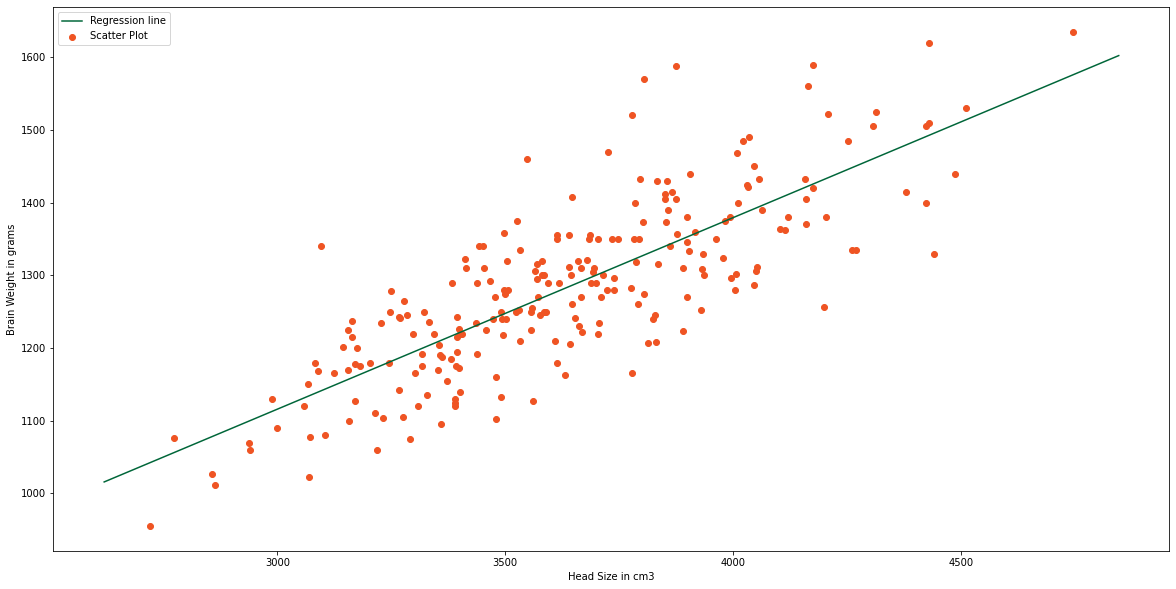

In [4]:
#plotting the model now
max_x=np.max(X)+100
min_x=np.min(X)-100

#finding line values
x=np.linspace(min_x,max_x,1000)
y=m*x+c

#plotting line
plt.plot(x,y,color='#006639',label='Regression line')
plt.scatter(X,Y,c='#ef5423', label='Scatter Plot')

plt.xlabel("Head Size in cm3")
plt.ylabel("Brain Weight in grams")
plt.legend()
plt.show()

In [5]:
#finding R^2 values
ss_total=0
ss_residual=0

for i in range(n):
    y_predicted=m*X[i]+c
    ss_residual+=(Y[i]-y_predicted)**2
    ss_total+=(Y[i]-mean_y)**2
    
r2=1-(ss_residual/ss_total)
print(r2)

0.6393117199570003


## Using Sklearn for same code implementation

In [9]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank 1 matrix in scikit learn
X=X.reshape(n,1)

#creating model and fitting the training data
reg=LinearRegression()
reg=reg.fit(X,Y)

#Y prediction
Y_pred=reg.predict(X)

#finding R2 score
r2_score=reg.score(X,Y)
print(r2_score)

0.639311719957
